# Bias-variance tradeoff
- Scikit-learn documentation: [Underfitting vs. Overfitting](http://scikit-learn.org/stable/auto_examples/model_selection/plot_underfitting_overfitting.html)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

### Parameters

In [2]:
n_samples = 100
degrees = [1, 4, 15]

### Sample dataset
- **가정**: $ y = cos(1.5\pi * x) $ 라는 true function을 우리가 알고 있다고 가정
- 현실에서 관측된 sample data는 true function에 약간의 노이즈가 추가됨

In [3]:
np.random.seed(0)

true_fun = lambda X: np.cos(1.5 * np.pi * X)
X = np.sort(np.random.rand(n_samples))
y = true_fun(X) + np.random.randn(n_samples) * 0.1

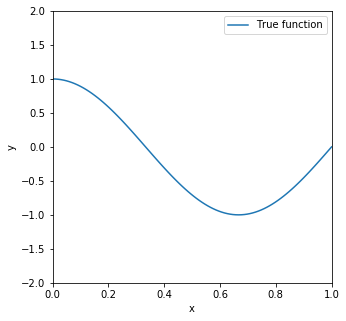

In [4]:
plt.figure(figsize=(5, 5))
X_test = np.linspace(0, 1, 100)
plt.plot(X_test, true_fun(X_test), label="True function")
plt.xlabel("x")
plt.ylabel("y")
plt.xlim((0, 1))
plt.ylim((-2, 2))
plt.legend(loc="best")
plt.show()

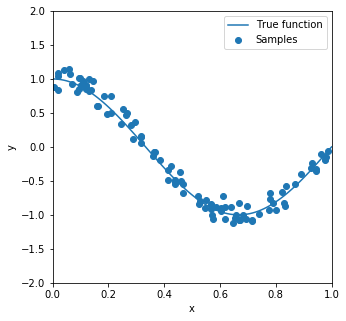

In [5]:
plt.figure(figsize=(5, 5))
X_test = np.linspace(0, 1, 100)
plt.plot(X_test, true_fun(X_test), label="True function")
plt.scatter(X, y, label="Samples")
plt.xlabel("x")
plt.ylabel("y")
plt.xlim((0, 1))
plt.ylim((-2, 2))
plt.legend(loc="best")
plt.show()

### Linear regression with polynomial fitting
- Sample dataset에 다항항수를 fitting시켜봅시다.
- degree는 최고차항의 차수

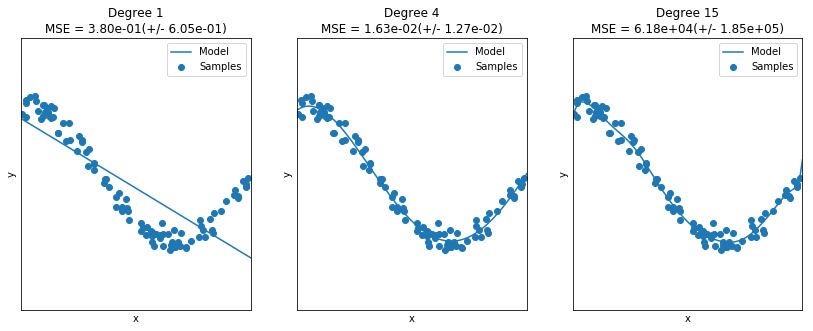

In [6]:
# Plot the points and fitted models
plt.figure(figsize=(14, 5))
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())

    polynomial_features = PolynomialFeatures(degree=degrees[i],
                                             include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
    pipeline.fit(X[:, np.newaxis], y)

    # Evaluate the models using cross-validation
    scores = cross_val_score(pipeline, X[:, np.newaxis], y,
                             scoring="neg_mean_squared_error", cv=10)

    X_test = np.linspace(0, 1, 100)
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
#     plt.plot(X_test, true_fun(X_test), label="True function")
    plt.scatter(X, y, label="Samples")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.legend(loc="best")
    plt.title("Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(
        degrees[i], -scores.mean(), scores.std()))
plt.show()

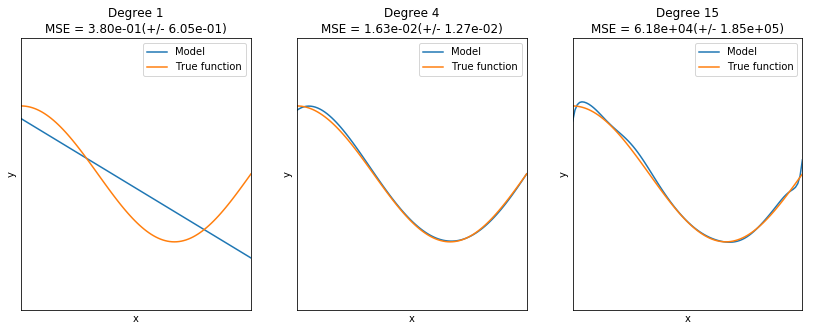

In [7]:
# Plot the true functions and fitted models
plt.figure(figsize=(14, 5))
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())

    polynomial_features = PolynomialFeatures(degree=degrees[i],
                                             include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
    pipeline.fit(X[:, np.newaxis], y)

    # Evaluate the models using cross-validation
    scores = cross_val_score(pipeline, X[:, np.newaxis], y,
                             scoring="neg_mean_squared_error", cv=10)
    
    X_test = np.linspace(0, 1, 100)
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
    plt.plot(X_test, true_fun(X_test), label="True function")
#     plt.scatter(X, y, label="Samples")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.legend(loc="best")
    plt.title("Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(
        degrees[i], -scores.mean(), scores.std()))
plt.show()

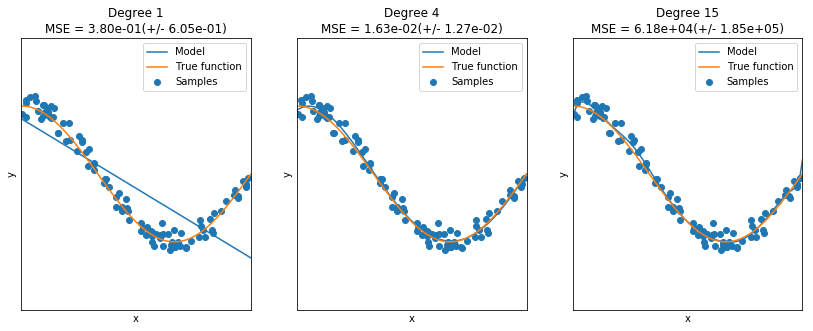

In [8]:
# Plot the points, the true function, and fitted models 
plt.figure(figsize=(14, 5))
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())

    polynomial_features = PolynomialFeatures(degree=degrees[i],
                                             include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
    pipeline.fit(X[:, np.newaxis], y)

    # Evaluate the models using cross-validation
    scores = cross_val_score(pipeline, X[:, np.newaxis], y,
                             scoring="neg_mean_squared_error", cv=10)

    X_test = np.linspace(0, 1, 100)
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
    plt.plot(X_test, true_fun(X_test), label="True function")
    plt.scatter(X, y, label="Samples")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.legend(loc="best")
    plt.title("Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(
        degrees[i], -scores.mean(), scores.std()))
plt.show()

### 현실적으로는, 
- 우리는 true function을 절대 알 수 없다.
- 하나의 포인트는 여러 입력 변수에 의해 표현된 고차원의 벡터이므로 그림으로 underfitting과 overfitting 여부를 알 수 없다.

### 따라서,
- 모델 학습에 사용되지 않는 unseen samples(여기서는 test samples)를 사용하여,
- Training samples에 대한 모델평가결과와, unseen samples에 대한 모델평가결과를 계산해볼 것!

In [9]:
np.random.seed(1000)

true_fun = lambda X: np.cos(1.5 * np.pi * X)
X_unseen = np.sort(np.random.rand(n_samples))
y_unseen = true_fun(X_unseen) + np.random.randn(n_samples) * 0.1

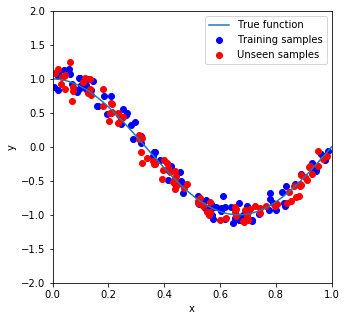

In [10]:
plt.figure(figsize=(5, 5))
X_test = np.linspace(0, 1, 100)
plt.plot(X_test, true_fun(X_test), label="True function")
plt.scatter(X, y, label="Training samples", c='blue')
plt.scatter(X_unseen, y_unseen, label="Unseen samples", c='red')
plt.xlabel("x")
plt.ylabel("y")
plt.xlim((0, 1))
plt.ylim((-2, 2))
plt.legend(loc="best")
plt.show()

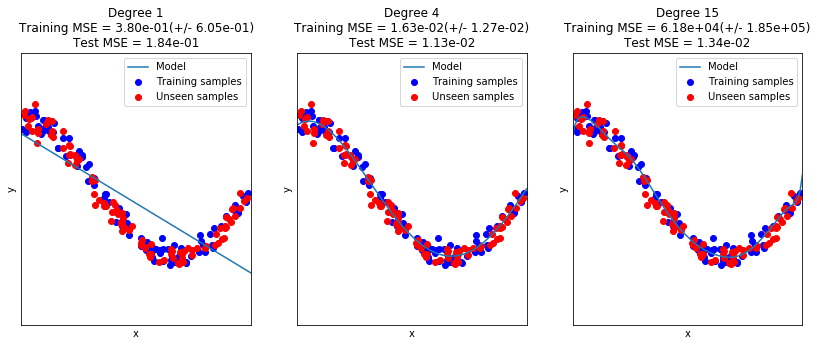

In [11]:
# Plot the points, the true function, and fitted models 
plt.figure(figsize=(14, 5))
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())

    polynomial_features = PolynomialFeatures(degree=degrees[i],
                                             include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
    pipeline.fit(X[:, np.newaxis], y)

    # Evaluate the models using cross-validation
    scores = cross_val_score(pipeline, X[:, np.newaxis], y,
                             scoring="neg_mean_squared_error", cv=10)
    
    test_scores = mean_squared_error(pipeline.predict(X_unseen[:, np.newaxis]), y_unseen)
    
    X_test = np.linspace(0, 1, 100)
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
#     plt.plot(X_test, true_fun(X_test), label="True function")
    plt.scatter(X, y, label="Training samples", c='blue')
    plt.scatter(X_unseen, y_unseen, label="Unseen samples", c='red')
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.legend(loc="best")
    plt.title("Degree {}\nTraining MSE = {:.2e}(+/- {:.2e})\nTest MSE = {:.2e}".format(
        degrees[i], -scores.mean(), scores.std(), test_scores))
plt.show()